# 库

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from datetime import date  

In [2]:
from WindPy import *
w.start()


Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2024 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [5]:
import Wind_util
import BrownianMotion
import Eval_util
import logger_util
logger = logger_util.setup_logger('investment_research')

In [6]:
price_data = Wind_util.get_hfq_price(['000300.SH','CBA00301.CS'],'2015-01-01','2025-10-21')
ret_data = price_data.pct_change()

在过去的10年中，债券凭借其较低的波动率和相对于货币基金投资更高的收益率，从而成为券商和公募投资部门的主要投资对象。经典的80%债券20%权益或者90%债券10%权益的组合，被广泛应用于券商和公募基金的投资组合中。但伴随着2024年债券收益率的不但下探，如今中国债券已经进入了低利率时代，债券相较于权益极低的收益率使其难以满足投资者的需求，但是权益类产品较高的波动率又使得投资者望而却步。如何稳定的获取目标收益率已成为了当下各投资机构的研究重点。

# 股+债

In [8]:
equity_performance = Eval_util.Year_analysis(ret_data['000300.SH'],save_=False).iloc[:,:6]
fixincome_performance = Eval_util.Year_analysis(ret_data['CBA00301.CS'],save_=False).iloc[:,:6]

数据读取成功，共2623行数据
列名: ['000300.SH']

前5行数据:
            000300.SH
2015-01-05        NaN
2015-01-06  -0.000132
2015-01-07   0.000750
2015-01-08  -0.023199
2015-01-09  -0.003522

数据清洗后，共2622行有效数据

开始计算年度风险收益指标和VaR分析...
正在计算每日过去250天的回撤率...
回撤数据已保存到draw.xlsx
正在分析 2015 年...
正在分析 2016 年...
正在分析 2017 年...
正在分析 2018 年...
正在分析 2019 年...
正在分析 2020 年...
正在分析 2021 年...
正在分析 2022 年...
正在分析 2023 年...
正在分析 2024 年...
正在分析 2025 年...

=== 策略年度风险收益分析结果（含VaR分析）===

年度分析结果:
------------------------------------------------------------------------------------------------------------------------------------------------------
年度     区间收益率      最大回撤       年初最低回撤       基于回撤额度          年化波动率      夏普比率       卡玛比率      
       预计95%VaR     预计95%规模        
------------------------------------------------------------------------------------------------------------------------------------------------------
2015   0.0246     -0.4348    -0.1691       0.3939     0.0624     0.0565    
       NaN          NaN            

20

In [9]:
print(equity_performance)
print(fixincome_performance)    
'''
可以观察到固收的波动率远低于权益产品，在过去十年中，除了2017年，剩余年份固收均为正收益。
'''

      年度   区间收益率   年化波动率    最大回撤    夏普比率    卡玛比率
0   2015  0.0246  0.3939 -0.4348  0.0624  0.0565
1   2016 -0.1128  0.2222 -0.1938 -0.5076 -0.5821
2   2017  0.2178  0.1015 -0.0607  2.1461  3.5888
3   2018 -0.2531  0.2142 -0.3188 -1.1814 -0.7940
4   2019  0.3607  0.1985 -0.1349  1.8168  2.6735
5   2020  0.2721  0.2277 -0.1608  1.1950  1.6923
6   2021 -0.0520  0.1859 -0.1819 -0.2797 -0.2858
7   2022 -0.2163  0.2041 -0.2865 -1.0601 -0.7550
8   2023 -0.1138  0.1350 -0.2151 -0.8428 -0.5289
9   2024  0.1468  0.2139 -0.1441  0.6866  1.0193
10  2025  0.1710  0.1575 -0.1049  1.0861  1.6301
      年度   区间收益率   年化波动率    最大回撤    夏普比率    卡玛比率
0   2015  0.0794  0.0181 -0.0178  4.3938  4.4510
1   2016  0.0128  0.0195 -0.0421  0.6564  0.3043
2   2017 -0.0120  0.0143 -0.0196 -0.8433 -0.6157
3   2018  0.0961  0.0174 -0.0110  5.5079  8.7168
4   2019  0.0441  0.0136 -0.0126  3.2561  3.5085
5   2020  0.0307  0.0243 -0.0390  1.2646  0.7877
6   2021  0.0569  0.0125 -0.0066  4.5447  8.5816
7   2022  0.0335  0.

'\n可以观察到固收的波动率远低于权益产品，在过去十年中，除了2017年，剩余年份固收均为正收益。\n'

In [10]:
'''
考虑简单的持有策略：80%，20%的组合以及90%，10%的组合
'''
st8020_t = ret_data['000300.SH']*0.2 + ret_data['CBA00301.CS']*0.8
st9010_t = ret_data['000300.SH']*0.1 + ret_data['CBA00301.CS']*0.9


In [11]:
def max_draw(pv):
    cum_max = pv.cummax() 
    drawdown = (cum_max - pv) / cum_max
    return -drawdown


In [15]:
_8020_performance = Eval_util.Year_analysis(st8020)
_9010_performance = Eval_util.Year_analysis(st9010)


数据读取成功，共2623行数据
列名: [0]

前5行数据:
                   0
2015-01-05       NaN
2015-01-06 -0.000208
2015-01-07  0.000465
2015-01-08 -0.004661
2015-01-09 -0.000689

数据清洗后，共2622行有效数据

开始计算年度风险收益指标和VaR分析...
正在计算每日过去250天的回撤率...
回撤数据已保存到draw.xlsx
正在分析 2015 年...
正在分析 2016 年...
正在分析 2017 年...
正在分析 2018 年...
正在分析 2019 年...
正在分析 2020 年...
正在分析 2021 年...
正在分析 2022 年...
正在分析 2023 年...
正在分析 2024 年...
正在分析 2025 年...

=== 策略年度风险收益分析结果（含VaR分析）===

年度分析结果:
------------------------------------------------------------------------------------------------------------------------------------------------------
年度     区间收益率      最大回撤       年初最低回撤       基于回撤额度          年化波动率      夏普比率       卡玛比率      
       预计95%VaR     预计95%规模        
------------------------------------------------------------------------------------------------------------------------------------------------------
2015   0.0813     -0.0923    -0.0091       0.0797     1.0203     0.8809    
       NaN          NaN            

2016   -0.0098    

In [ ]:
_8020_performance.set_index('年度',inplace=True)
_9010_performance.set_index('年度',inplace=True)

In [40]:
print(_8020_performance)
print(_9010_performance)

       区间收益率   年化波动率    最大回撤    夏普比率    卡玛比率   预计95%VaR 预计95%投资规模(万元)  年初到最低点回撤 年内最大亏损额(万元)
年度                                                                                         
2015  0.0813  0.0797 -0.0923  1.0203  0.8809        NaN           NaN   -0.0091         nan
2016 -0.0098  0.0485 -0.0399 -0.2030 -0.2466        NaN           NaN   -0.0510         nan
2017  0.0310  0.0238 -0.0227  1.3017  1.3665        NaN           NaN   -0.0140         nan
2018  0.0189  0.0423 -0.0247  0.4482  0.7658        NaN           NaN   -0.0046         nan
2019  0.1045  0.0374 -0.0228  2.7894  4.5843  -0.063705     313944.76   -0.0001      -46.10
2020  0.0797  0.0424 -0.0310  1.8802  2.5682  -0.055542     360089.65   -0.0066    -2360.17
2021  0.0369  0.0389 -0.0277  0.9488  1.3338  -0.053442     374236.14   -0.0068    -2555.87
2022 -0.0189  0.0411 -0.0441 -0.4594 -0.4288  -0.034242     584073.89   -0.0427   -24928.82
2023  0.0137  0.0258 -0.0308  0.5332  0.4460  -0.031262     639750.65    0.0000 

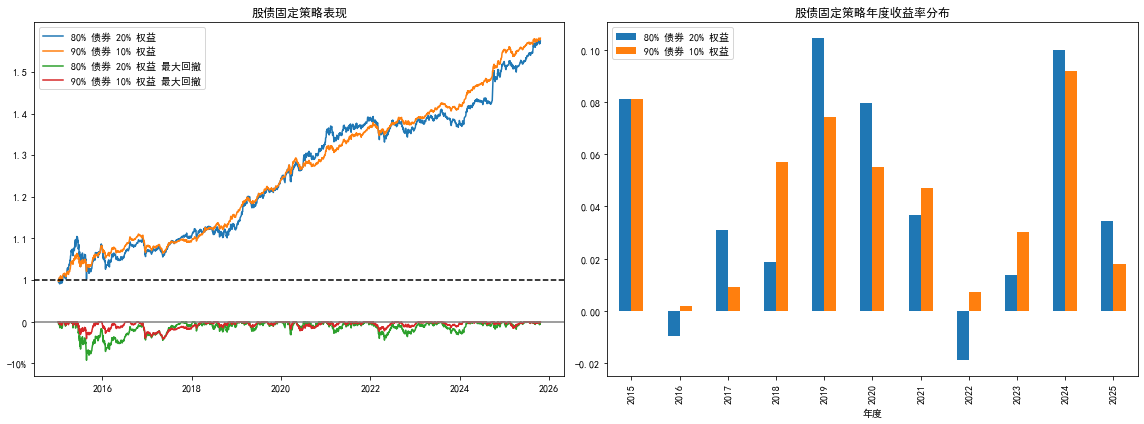

In [ ]:
#pv
st8020 = st8020_t
st9010 = st9010_t
pv8020 = (1+st8020).cumprod()
pv9010 = (1+st9010).cumprod()

_8020_performance = Eval_util.Year_analysis(st8020)
_9010_performance = Eval_util.Year_analysis(st9010)

fig,axs = plt.subplots(1,2,figsize=(16,6))
# plt.figure(figsize=(8,6))
axs[0].plot(pv8020,label='80% 债券 20% 权益')
axs[0].plot(pv9010,label='90% 债券 10% 权益')
axs[0].axhline(y=1, xmin=0, xmax=2025, color='black', linestyle='--')
axs[0].plot(max_draw(pv8020)+0.9,label='80% 债券 20% 权益 最大回撤')
axs[0].plot(max_draw(pv9010)+0.9,label='90% 债券 10% 权益 最大回撤')
axs[0].axhline(y=0.9, xmin=0, xmax=2025, color='grey', linestyle='-')
axs[0].set_yticks([0.8,0.9,1,1.1,1.2,1.3,1.4,1.5])
axs[0].set_yticklabels(['-10%',0,1,1.1,1.2,1.3,1.4,1.5])
axs[0].legend()
axs[0].set_title('股债固定策略表现')


year_performance = pd.concat([_8020_performance['区间收益率'],_9010_performance['区间收益率']],axis=1)
year_performance.columns = ['80% 债券 20% 权益','90% 债券 10% 权益']
axs[1] = year_performance.plot(kind='bar',ax=axs[1])
axs[1].set_title('股债固定策略年度收益率分布')
plt.tight_layout()
plt.show()

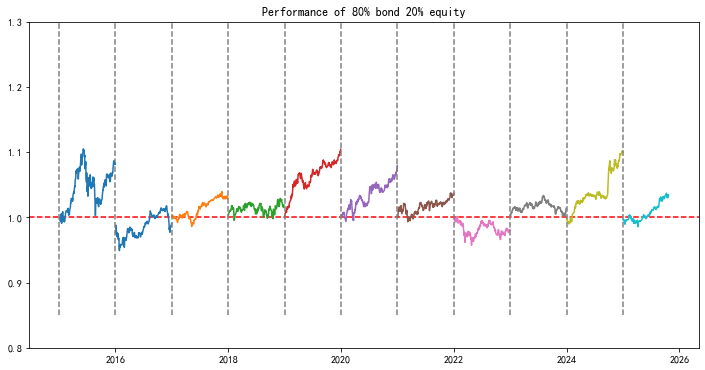

In [19]:
year_pv8020 = (1+st8020).groupby(ret_data.index.year).cumprod()
year_pv9010 = (1+st9010).groupby(ret_data.index.year).cumprod()

plt.figure(figsize=(12,6))
plt.axhline(y=1, xmin=0, xmax=2025, color='r', linestyle='--')
plt.ylim(0.8, 1.3)
for i in list(set(year_pv8020.index.year)):
    plt.plot(year_pv8020[year_pv8020.index.year==i])
    plt.axvline(x=date(year=i, month=1, day=1), ymin=0.1, ymax=1.3, color='grey', linestyle='--')
plt.title('Performance of 80% bond 20% equity')
plt.show()

In [20]:
#8020 
eval_8020 = Eval_util.Year_analysis(st8020,save_=False).iloc[:,:6]
eval_9010 = Eval_util.Year_analysis(st9010,save_=False).iloc[:,:6]

数据读取成功，共2623行数据
列名: [0]

前5行数据:
                   0
2015-01-05       NaN
2015-01-06 -0.000208
2015-01-07  0.000465
2015-01-08 -0.004661
2015-01-09 -0.000689

数据清洗后，共2622行有效数据

开始计算年度风险收益指标和VaR分析...
正在计算每日过去250天的回撤率...
回撤数据已保存到draw.xlsx
正在分析 2015 年...
正在分析 2016 年...
正在分析 2017 年...
正在分析 2018 年...
正在分析 2019 年...
正在分析 2020 年...
正在分析 2021 年...
正在分析 2022 年...
正在分析 2023 年...
正在分析 2024 年...
正在分析 2025 年...

=== 策略年度风险收益分析结果（含VaR分析）===

年度分析结果:
------------------------------------------------------------------------------------------------------------------------------------------------------
年度     区间收益率      最大回撤       年初最低回撤       基于回撤额度          年化波动率      夏普比率       卡玛比率      
       预计95%VaR     预计95%规模        
------------------------------------------------------------------------------------------------------------------------------------------------------
2015   0.0813     -0.0923    -0.0091       0.0797     1.0203     0.8809    
       NaN          NaN            

2016   -0.0098    

In [28]:
print(eval_8020)
print(eval_9010)


      年度   区间收益率   年化波动率    最大回撤    夏普比率    卡玛比率
0   2015  0.0813  0.0797 -0.0923  1.0203  0.8809
1   2016 -0.0098  0.0485 -0.0399 -0.2030 -0.2466
2   2017  0.0310  0.0238 -0.0227  1.3017  1.3665
3   2018  0.0189  0.0423 -0.0247  0.4482  0.7658
4   2019  0.1045  0.0374 -0.0228  2.7894  4.5843
5   2020  0.0797  0.0424 -0.0310  1.8802  2.5682
6   2021  0.0369  0.0389 -0.0277  0.9488  1.3338
7   2022 -0.0189  0.0411 -0.0441 -0.4594 -0.4288
8   2023  0.0137  0.0258 -0.0308  0.5332  0.4460
9   2024  0.1000  0.0402 -0.0177  2.4848  5.6597
10  2025  0.0346  0.0295 -0.0179  1.1747  1.9366
      年度   区间收益率   年化波动率    最大回撤    夏普比率     卡玛比率
0   2015  0.0812  0.0422 -0.0404  1.9245   2.0071
1   2016  0.0017  0.0296 -0.0394  0.0562   0.0423
2   2017  0.0093  0.0168 -0.0191  0.5538   0.4872
3   2018  0.0571  0.0238 -0.0141  2.3943   4.0530
4   2019  0.0741  0.0195 -0.0126  3.8071   5.8694
5   2020  0.0552  0.0251 -0.0215  2.2028   2.5657
6   2021  0.0470  0.0221 -0.0126  2.1242   3.7408
7   2022  0.

In [57]:
pv_rolling = pd.DataFrame()
for i in range(0,len(st9010)-250,5):
    sub_pv = (1+st9010[i:i+250]).cumprod().reset_index(drop=True)
    pv_rolling = pd.concat([pv_rolling,sub_pv],axis=1)
pv_rolling.fillna(1,inplace=True)


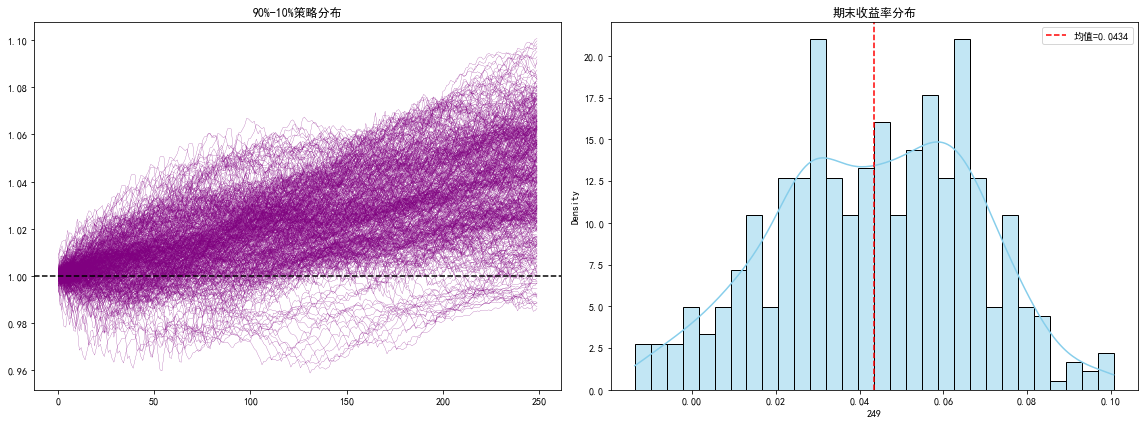

In [63]:
fig,axs = plt.subplots(1,2,figsize=(16,6))
# plt.figure(figsize=(8,6))
axs[0].plot(pv_rolling,color='purple',linewidth=0.2)
axs[0].axhline(1,color='k',linestyle='--')
axs[0].set_title('90%-10%策略分布')


import seaborn as sns  
ret_oneyear = (pv_rolling.iloc[-1,:]-1)
axs[1] = sns.histplot(ret_oneyear, kde=True, bins=30, stat='density', color='skyblue',ax=axs[1])  
axs[1].axvline(ret_oneyear.mean(), color='red', linestyle='--', label=f'均值={round(ret_oneyear.mean(),4)}')  
axs[1].set_title( '期末收益率分布')  
axs[1].legend()
plt.tight_layout()
plt.show()

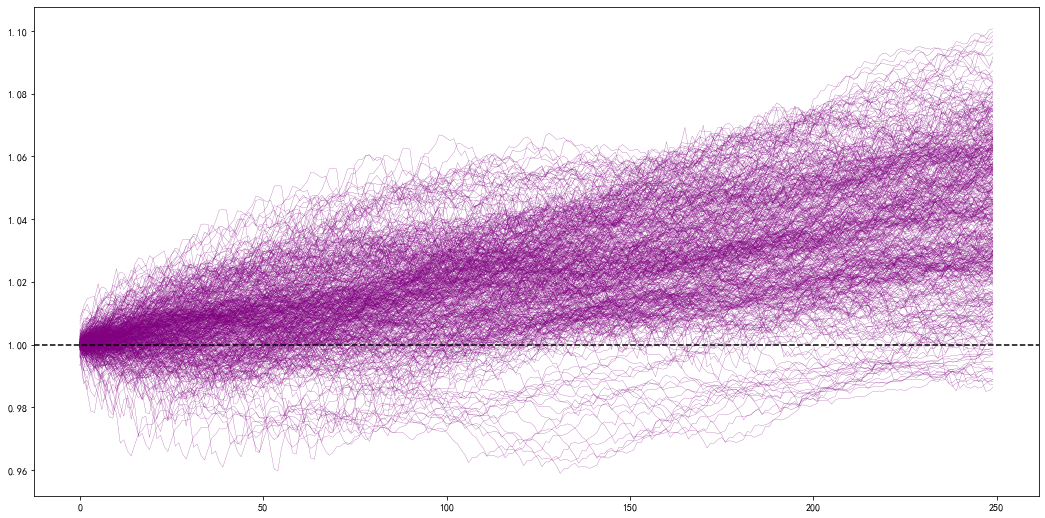

In [58]:
plt.figure(figsize=(18,9))
plt.plot(pv_rolling,color='purple',linewidth=0.2)
plt.axhline(1,color='k',linestyle='--')


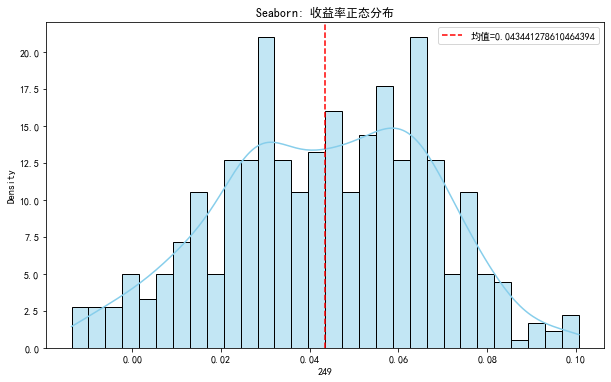

In [59]:
import seaborn as sns  
ret_oneyear = (pv_rolling.iloc[-1,:]-1)
plt.figure(figsize=(10, 6))  
sns.histplot(ret_oneyear, kde=True, bins=30, stat='density', color='skyblue')  
plt.axvline(ret_oneyear.mean(), color='red', linestyle='--', label=f'均值={ret_oneyear.mean()}')  
plt.title('Seaborn: 收益率正态分布')  
plt.legend()
plt.show()

# 加入黄金

In [64]:
'''
首先考虑加入商品类资产
黄金在过去的十年中具有较为不错的投资收益表现，考虑加入
'''
price_data = Wind_util.get_hfq_price(['000300.SH','CBA00301.CS','AU9999.SGE'],'2015-01-01','2025-10-21')
ret_data = price_data.pct_change()


In [65]:
gold_performance = Eval_util.Year_analysis(ret_data['AU9999.SGE'],save_=False).iloc[:,:6]

数据读取成功，共2623行数据
列名: ['AU9999.SGE']

前5行数据:
            AU9999.SGE
2015-01-05         NaN
2015-01-06    0.007897
2015-01-07    0.002639
2015-01-08   -0.001604
2015-01-09    0.000700

数据清洗后，共2622行有效数据

开始计算年度风险收益指标和VaR分析...
正在计算每日过去250天的回撤率...
回撤数据已保存到draw.xlsx
正在分析 2015 年...
正在分析 2016 年...
正在分析 2017 年...
正在分析 2018 年...
正在分析 2019 年...
正在分析 2020 年...
正在分析 2021 年...
正在分析 2022 年...
正在分析 2023 年...
正在分析 2024 年...
正在分析 2025 年...

=== 策略年度风险收益分析结果（含VaR分析）===

年度分析结果:
------------------------------------------------------------------------------------------------------------------------------------------------------
年度     区间收益率      最大回撤       年初最低回撤       基于回撤额度          年化波动率      夏普比率       卡玛比率      
       预计95%VaR     预计95%规模        
------------------------------------------------------------------------------------------------------------------------------------------------------
2015   -0.0737    -0.1684    -0.0986       0.1381     -0.5341    -0.4377   
       NaN          NaN         

In [66]:
print(gold_performance)

      年度   区间收益率   年化波动率    最大回撤    夏普比率    卡玛比率
0   2015 -0.0737  0.1381 -0.1684 -0.5341 -0.4377
1   2016  0.1842  0.1476 -0.1164  1.2474  1.5821
2   2017  0.0345  0.0821 -0.0736  0.4202  0.4682
3   2018  0.0425  0.0637 -0.0642  0.6673  0.6617
4   2019  0.1975  0.1253 -0.0866  1.5762  2.2803
5   2020  0.1444  0.1813 -0.1691  0.7962  0.8538
6   2021 -0.0414  0.1199 -0.1130 -0.3453 -0.3666
7   2022  0.0980  0.1108 -0.1097  0.8843  0.8934
8   2023  0.1683  0.1133 -0.0793  1.4857  2.1225
9   2024  0.2819  0.1307 -0.0717  2.1564  3.9342
10  2025  0.6056  0.1750 -0.1089  3.4614  5.5604


In [67]:
st801010 = ret_data['000300.SH']*0.1+ ret_data['AU9999.SGE']*0.1 + ret_data['CBA00301.CS']*0.8
pv801010 = (1+st801010).cumprod()

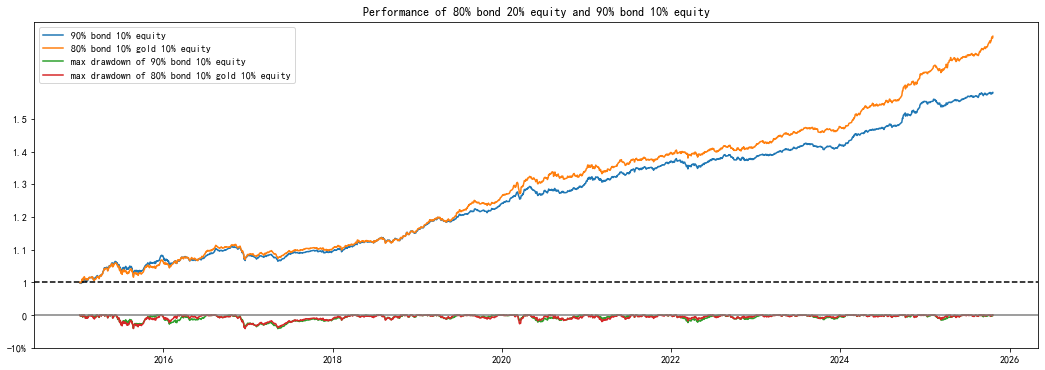

In [68]:
plt.figure(figsize=(18,6))
# plt.plot(pv8020,label='80% bond 20% equity')
plt.plot(pv9010,label='90% bond 10% equity')
plt.plot(pv801010,label='80% bond 10% gold 10% equity')
plt.axhline(y=1, xmin=0, xmax=2025, color='black', linestyle='--')
# plt.plot(max_draw(pv8020)+0.9,label='max drawdown of 80% bond 20% equity')
plt.plot(max_draw(pv9010)+0.9,label='max drawdown of 90% bond 10% equity')
plt.plot(max_draw(pv801010)+0.9,label='max drawdown of 80% bond 10% gold 10% equity')
plt.axhline(y=0.9, xmin=0, xmax=2025, color='grey', linestyle='-')
plt.yticks([0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],['-10%',0,1,1.1,1.2,1.3,1.4,1.5])
plt.legend()
plt.title('Performance of 80% bond 20% equity and 90% bond 10% equity')
plt.show()

In [69]:
pv_rolling = pd.DataFrame()
for i in range(0,len(st801010)-250,5):
    sub_pv = (1+st801010[i:i+250]).cumprod().reset_index(drop=True)
    pv_rolling = pd.concat([pv_rolling,sub_pv],axis=1)
pv_rolling.fillna(1,inplace=True)


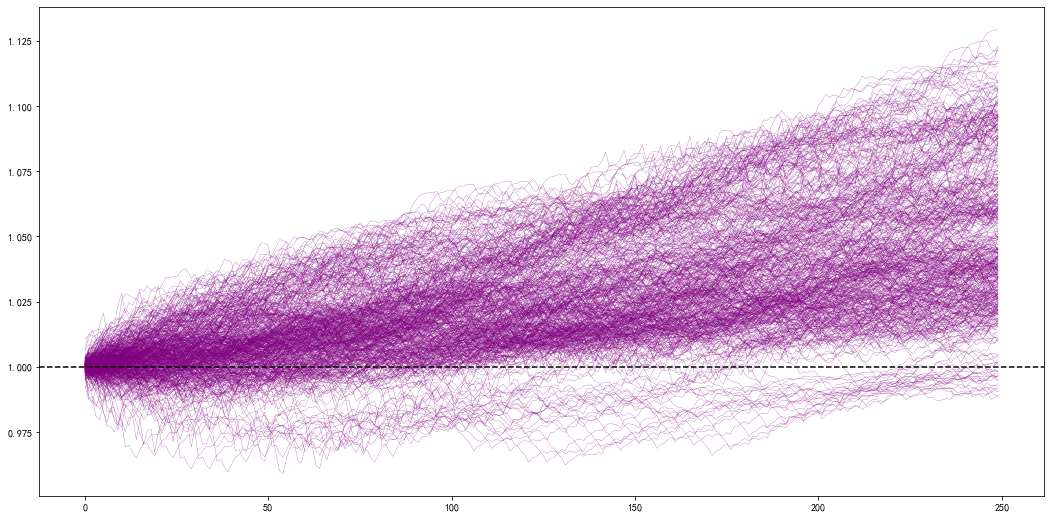

In [70]:
plt.figure(figsize=(18,9))
plt.plot(pv_rolling,color='purple',linewidth=0.2)
plt.axhline(1,color='k',linestyle='--')

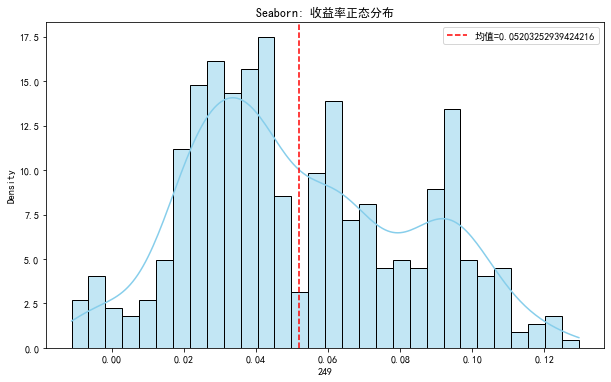

In [71]:
import seaborn as sns  
ret_oneyear = (pv_rolling.iloc[-1,:]-1)
plt.figure(figsize=(10, 6))  
sns.histplot(ret_oneyear, kde=True, bins=30, stat='density', color='skyblue')  
plt.axvline(ret_oneyear.mean(), color='red', linestyle='--', label=f'均值={ret_oneyear.mean()}')  
plt.title('Seaborn: 收益率正态分布')  
plt.legend()  
plt.show()

# 更多的商品

In [48]:
'''
加入南华商品指数，让我们的的投资中包含更多的商品
'''

'\n加入南华商品指数，让我们的的投资中包含更多的商品\n'

In [72]:
price_data = Wind_util.get_hfq_price(['000300.SH','CBA00301.CS','AU9999.SGE','NH0100.NHF'],'2015-01-01','2025-10-21')
ret_data = price_data.pct_change()

In [73]:
com_performance = Eval_util.Year_analysis(ret_data['NH0100.NHF'],save_=False).iloc[:,:6]
print(com_performance)

数据读取成功，共2623行数据
列名: ['NH0100.NHF']

前5行数据:
            NH0100.NHF
2015-01-05         NaN
2015-01-06    0.010103
2015-01-07   -0.004400
2015-01-08   -0.000110
2015-01-09   -0.004809

数据清洗后，共2622行有效数据

开始计算年度风险收益指标和VaR分析...
正在计算每日过去250天的回撤率...
回撤数据已保存到draw.xlsx
正在分析 2015 年...
正在分析 2016 年...
正在分析 2017 年...
正在分析 2018 年...
正在分析 2019 年...
正在分析 2020 年...
正在分析 2021 年...
正在分析 2022 年...
正在分析 2023 年...
正在分析 2024 年...
正在分析 2025 年...

=== 策略年度风险收益分析结果（含VaR分析）===

年度分析结果:
------------------------------------------------------------------------------------------------------------------------------------------------------
年度     区间收益率      最大回撤       年初最低回撤       基于回撤额度          年化波动率      夏普比率       卡玛比率      
       预计95%VaR     预计95%规模        
------------------------------------------------------------------------------------------------------------------------------------------------------
2015   -0.1352    -0.2199    -0.1915       0.1338     -1.0101    -0.6148   
       NaN          NaN         

In [74]:
st_com = ret_data['000300.SH']*0.1+ ret_data['AU9999.SGE']*0.1 + ret_data['CBA00301.CS']*0.7 + ret_data['NH0100.NHF']*0.1
pvcom = (1+st_com).cumprod()


数据读取成功，共2623行数据
列名: [0]

前5行数据:
                   0
2015-01-05       NaN
2015-01-06  0.001628
2015-01-07  0.000175
2015-01-08 -0.002510
2015-01-09 -0.000750

数据清洗后，共2622行有效数据

开始计算年度风险收益指标和VaR分析...
正在计算每日过去250天的回撤率...
回撤数据已保存到draw.xlsx
正在分析 2015 年...
正在分析 2016 年...
正在分析 2017 年...
正在分析 2018 年...
正在分析 2019 年...
正在分析 2020 年...
正在分析 2021 年...
正在分析 2022 年...
正在分析 2023 年...
正在分析 2024 年...
正在分析 2025 年...

=== 策略年度风险收益分析结果（含VaR分析）===

年度分析结果:
------------------------------------------------------------------------------------------------------------------------------------------------------
年度     区间收益率      最大回撤       年初最低回撤       基于回撤额度          年化波动率      夏普比率       卡玛比率      
       预计95%VaR     预计95%规模        
------------------------------------------------------------------------------------------------------------------------------------------------------
2015   0.0429     -0.0547    -0.0015       0.0494     0.8689     0.7845    
       NaN          NaN            

2016   0.0618     

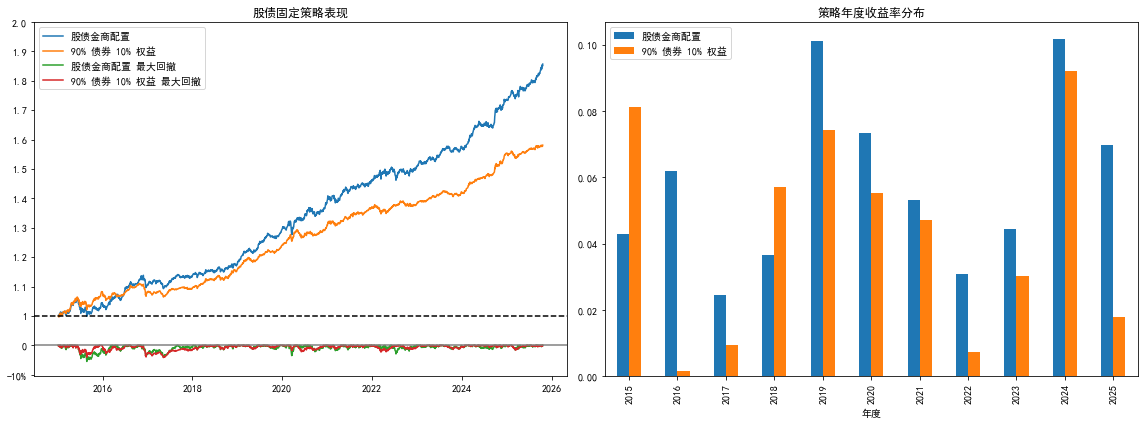

In [78]:
#pv
_com_performance = Eval_util.Year_analysis(st_com)
_9010_performance = Eval_util.Year_analysis(st9010)
_com_performance.set_index('年度',inplace=True)
_9010_performance.set_index('年度',inplace=True)
fig,axs = plt.subplots(1,2,figsize=(16,6))
# plt.figure(figsize=(8,6))
axs[0].plot(pvcom,label='股债金商配置')
axs[0].plot(pv9010,label='90% 债券 10% 权益')
axs[0].axhline(y=1, xmin=0, xmax=2025, color='black', linestyle='--')
axs[0].plot(max_draw(pvcom)+0.9,label='股债金商配置 最大回撤')
axs[0].plot(max_draw(pv9010)+0.9,label='90% 债券 10% 权益 最大回撤')
axs[0].axhline(y=0.9, xmin=0, xmax=2025, color='grey', linestyle='-')
axs[0].set_yticks([0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0])
axs[0].set_yticklabels(['-10%',0,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0])
axs[0].legend()
axs[0].set_title('股债固定策略表现')


year_performance = pd.concat([_com_performance['区间收益率'],_9010_performance['区间收益率']],axis=1)
year_performance.columns = ['股债金商配置','90% 债券 10% 权益']
axs[1] = year_performance.plot(kind='bar',ax=axs[1])
axs[1].set_title('策略年度收益率分布')
plt.tight_layout()
plt.show()

In [79]:
pv_rolling = pd.DataFrame()
for i in range(0,len(st_com)-250,5):
    sub_pv = (1+st_com[i:i+250]).cumprod().reset_index(drop=True)
    pv_rolling = pd.concat([pv_rolling,sub_pv],axis=1)
pv_rolling.fillna(1,inplace=True)

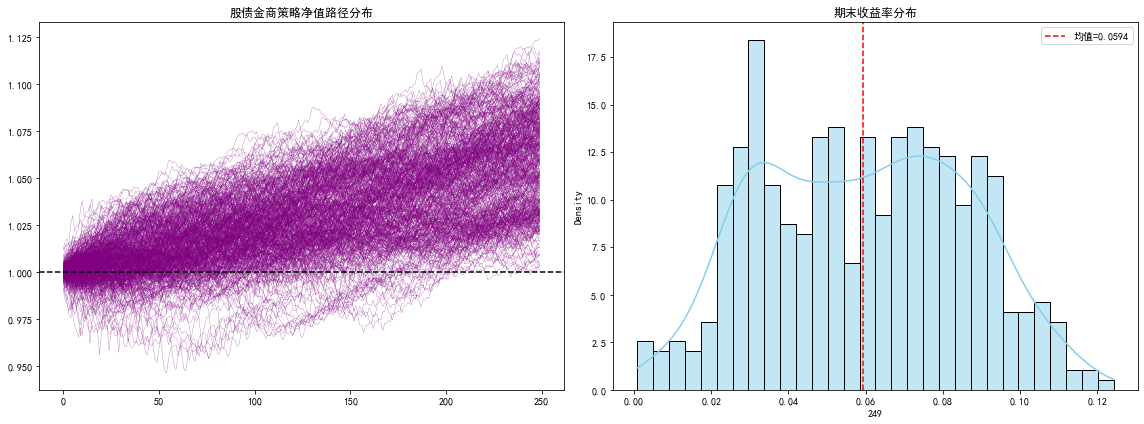

In [83]:
fig,axs = plt.subplots(1,2,figsize=(16,6))
# plt.figure(figsize=(8,6))
axs[0].plot(pv_rolling,color='purple',linewidth=0.2)
axs[0].axhline(1,color='k',linestyle='--')
axs[0].set_title('股债金商策略净值路径分布')


import seaborn as sns  
ret_oneyear = (pv_rolling.iloc[-1,:]-1)
axs[1] = sns.histplot(ret_oneyear, kde=True, bins=30, stat='density', color='skyblue',ax=axs[1])  
axs[1].axvline(ret_oneyear.mean(), color='red', linestyle='--', label=f'均值={round(ret_oneyear.mean(),4)}')  
axs[1].set_title( '期末收益率分布')  
axs[1].legend()
plt.tight_layout()
plt.show()

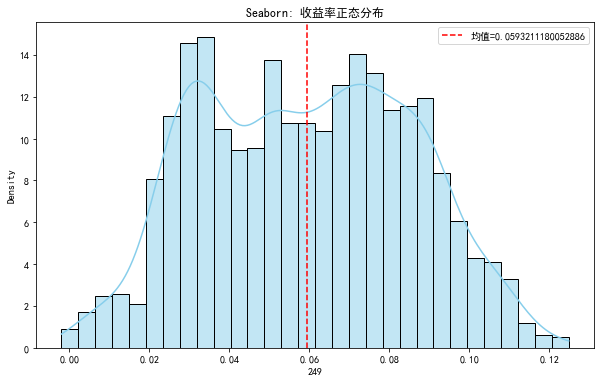

In [56]:
import seaborn as sns  
ret_oneyear = (pv_rolling.iloc[-1,:]-1)
plt.figure(figsize=(10, 6))  
sns.histplot(ret_oneyear, kde=True, bins=30, stat='density', color='skyblue')  
plt.axvline(ret_oneyear.mean(), color='red', linestyle='--', label=f'均值={ret_oneyear.mean()}')  
plt.title('Seaborn: 收益率正态分布')  
plt.legend()  
plt.show()

# 加入海外资产

In [ ]:
'''
考虑在投资时加入:
1. 美国股票：纳斯达克，标普
2. 港股：恒生指数
3. 日股：日经225
4. 美债：10年期美债
5. 英国：FTSE100指数
'''


In [84]:
price_foreign = Wind_util.get_hfq_price(['IXIC.GI','SPX.GI','HSI.HI','N225.GI','TY.CBT','FTSE.GI'],'2015-01-01','2025-10-21')

In [85]:
ret_foreign = price_foreign.pct_change()

In [86]:
ret_data = pd.concat([ret_data,ret_foreign],axis=1)

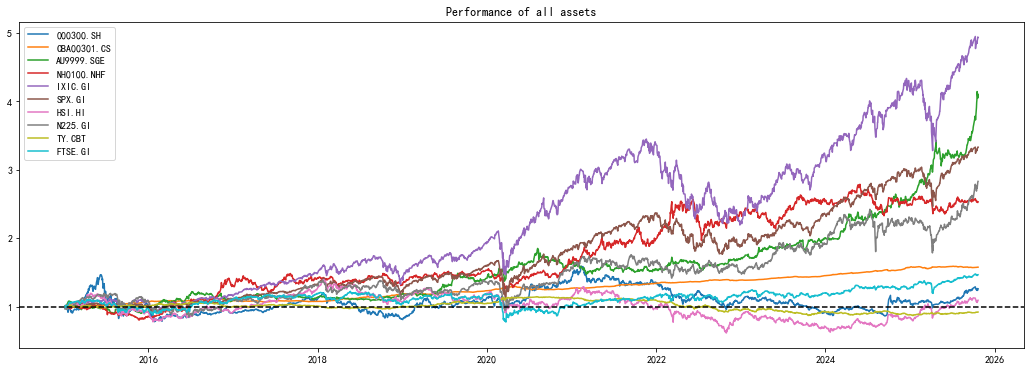

In [87]:
pv_all = (1+ret_data).cumprod()
plt.figure(figsize=(18,6))
plt.plot(pv_all,label=pv_all.columns)
plt.axhline(y=1, xmin=0, xmax=2025, color='black', linestyle='--')
# plt.yticks([0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],['-10%',0,1,1.1,1.2,1.3,1.4,1.5])
plt.legend()
plt.title('Performance of all assets')
plt.show()

In [91]:
ret_data.dropna().corr().to_csv("corr.csv")

In [125]:
st_ft = ret_data['000300.SH']*0.06+ret_data['AU9999.SGE']*0.10+ret_data['CBA00301.CS']*0.60 +ret_data['NH0100.NHF']*0.07+ret_data['SPX.GI']*0.09+ret_data['N225.GI']*0.08
pvft = (1+st_ft).cumprod()


数据读取成功，共2623行数据
列名: [0]

前5行数据:
                   0
2015-01-05       NaN
2015-01-06 -0.001863
2015-01-07  0.001294
2015-01-08  0.001369
2015-01-09 -0.001080

数据清洗后，共2622行有效数据

开始计算年度风险收益指标和VaR分析...
正在计算每日过去250天的回撤率...
回撤数据已保存到draw.xlsx
正在分析 2015 年...
正在分析 2016 年...
正在分析 2017 年...
正在分析 2018 年...
正在分析 2019 年...
正在分析 2020 年...
正在分析 2021 年...
正在分析 2022 年...
正在分析 2023 年...
正在分析 2024 年...
正在分析 2025 年...

=== 策略年度风险收益分析结果（含VaR分析）===

年度分析结果:
------------------------------------------------------------------------------------------------------------------------------------------------------
年度     区间收益率      最大回撤       年初最低回撤       基于回撤额度          年化波动率      夏普比率       卡玛比率      
       预计95%VaR     预计95%规模        
------------------------------------------------------------------------------------------------------------------------------------------------------
2015   0.0467     -0.0514    -0.0019       0.0481     0.9703     0.9076    
       NaN          NaN            

2016   0.0633     

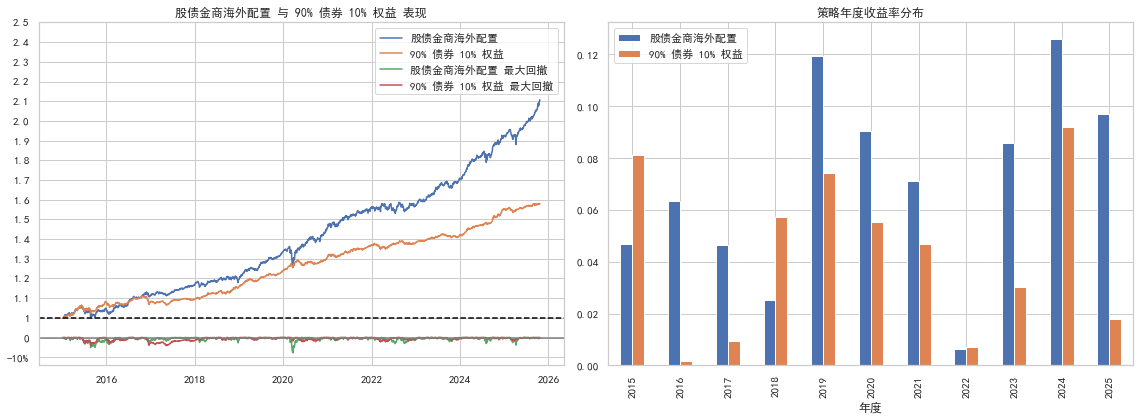

In [126]:
#pv
_ft_performance = Eval_util.Year_analysis(st_ft)
_9010_performance = Eval_util.Year_analysis(st9010)
_ft_performance.set_index('年度',inplace=True)
_9010_performance.set_index('年度',inplace=True)
fig,axs = plt.subplots(1,2,figsize=(16,6))
# plt.figure(figsize=(8,6))
axs[0].plot(pvft,label='股债金商海外配置')
axs[0].plot(pv9010,label='90% 债券 10% 权益')
axs[0].axhline(y=1, xmin=0, xmax=2025, color='black', linestyle='--')
axs[0].plot(max_draw(pvft)+0.9,label='股债金商海外配置 最大回撤')
axs[0].plot(max_draw(pv9010)+0.9,label='90% 债券 10% 权益 最大回撤')
axs[0].axhline(y=0.9, xmin=0, xmax=2025, color='grey', linestyle='-')
axs[0].set_yticks([0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5])
axs[0].set_yticklabels(['-10%',0,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5])
axs[0].legend()
axs[0].set_title('股债金商海外配置 与 90% 债券 10% 权益 表现')


year_performance = pd.concat([_ft_performance['区间收益率'],_9010_performance['区间收益率']],axis=1)
year_performance.columns = ['股债金商海外配置','90% 债券 10% 权益']
axs[1] = year_performance.plot(kind='bar',ax=axs[1])
axs[1].set_title('策略年度收益率分布')
plt.tight_layout()
plt.show()

In [34]:
pv_rolling = pd.DataFrame()
for i in range(len(st_ft)-250):
    sub_pv = (1+st_ft[i:i+250]).cumprod().reset_index(drop=True)
    pv_rolling = pd.concat([pv_rolling,sub_pv],axis=1)
pv_rolling.fillna(1,inplace=True)

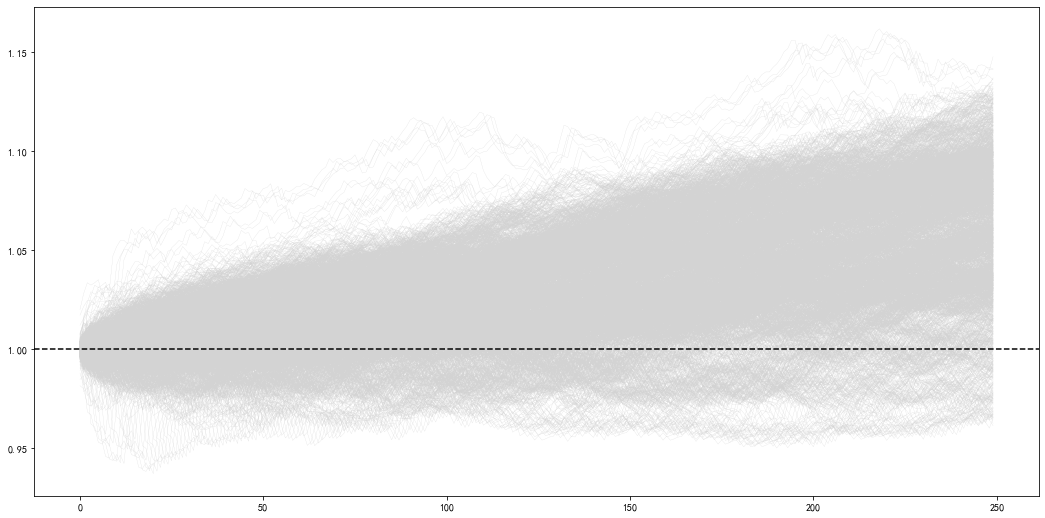

In [35]:
plt.figure(figsize=(18,9))
plt.plot(pv_rolling,color='lightgrey',linewidth=0.2)
plt.axhline(1,color='k',linestyle='--')

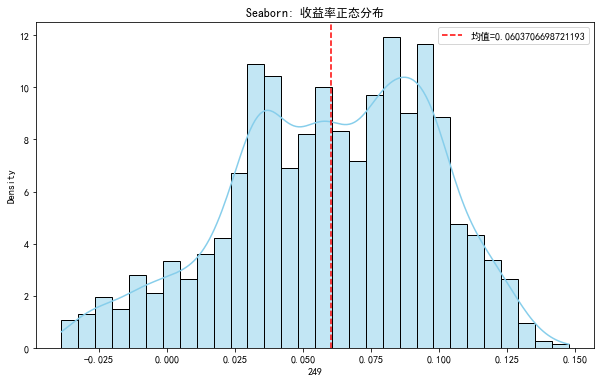

In [36]:
import seaborn as sns  
ret_oneyear = (pv_rolling.iloc[-1,:]-1)
plt.figure(figsize=(10, 6))  
sns.histplot(ret_oneyear, kde=True, bins=30, stat='density', color='skyblue')  
plt.axvline(ret_oneyear.mean(), color='red', linestyle='--', label=f'均值={ret_oneyear.mean()}')  
plt.title('Seaborn: 收益率正态分布')  
plt.legend()  
plt.show()

# 资产配置模型下的动态比例配置

In [95]:
import RP_solo_ver2_3
import importlib
importlib.reload(RP_solo_ver2_3)

2025-10-28 15:51:59,521 - RP_solo_ver2_3 - INFO - 日志建立完成
2025-10-28 15:51:59,564 - RP_solo_ver2_3 - INFO - 日志建立完成


<module 'RP_solo_ver2_3' from 'd:\\program_learning\\github\\低利率研究\\RP_solo_ver2_3.py'>

In [108]:
ret_data_1 = ret_data[['000300.SH','CBA00301.CS','AU9999.SGE','NH0100.NHF','SPX.GI','N225.GI']]

当前benchmark设置为:
{'801010': [0.8, 0.1, 0.1]}


2025-10-28 16:31:08,489 - RP_solo_ver2_3 - INFO - ==================================================
读取调仓日成功，调仓日期:
date_example:2016-01-04 00:00:00
date_example:2017-01-03 00:00:00
date_example:2018-01-02 00:00:00...


设置成功


2025-10-28 16:31:14,150 - RP_solo_ver2_3 - INFO - 回测，日期为：2016-01-04 00:00:00，产品为：['000300.SH', 'CBA00301.CS', 'AU9999.SGE', 'NH0100.NHF', 'SPX.GI', 'N225.GI']，权重为：[0.04128954935858504, 0.5975178063744928, 0.10913221498456817, 0.10227608937386676, 0.05904225925790435, 0.09074208065058294]
2025-10-28 16:31:20,218 - RP_solo_ver2_3 - INFO - 回测，日期为：2017-01-03 00:00:00，产品为：['000300.SH', 'CBA00301.CS', 'AU9999.SGE', 'NH0100.NHF', 'SPX.GI', 'N225.GI']，权重为：[0.08143649639219502, 0.46130335401290345, 0.18916732861415117, 0.04439376519572731, 0.11847515704183076, 0.10522389874319243]
2025-10-28 16:31:25,269 - RP_solo_ver2_3 - INFO - 回测，日期为：2018-01-02 00:00:00，产品为：['000300.SH', 'CBA00301.CS', 'AU9999.SGE', 'NH0100.NHF', 'SPX.GI', 'N225.GI']，权重为：[0.05654719796243832, 0.6035666797489226, 0.1446658124105779, 0.03469928942790229, 0.08423782460469467, 0.07628319584546424]
2025-10-28 16:31:32,016 - RP_solo_ver2_3 - INFO - 回测，日期为：2019-01-02 00:00:00，产品为：['000300.SH', 'CBA00301.CS', 'AU9999.SGE', 'NH0100.N

数据读取成功，共2373行数据
列名: [0]

前5行数据:
                   0
2016-01-04 -0.007907
2016-01-05  0.000527
2016-01-06 -0.000751
2016-01-07 -0.002763
2016-01-08  0.000611

数据清洗后，共2373行有效数据

开始计算年度风险收益指标和VaR分析...
正在计算每日过去250天的回撤率...
回撤数据已保存到draw.xlsx
正在分析 2016 年...
正在分析 2017 年...
正在分析 2018 年...
正在分析 2019 年...
正在分析 2020 年...
正在分析 2021 年...
正在分析 2022 年...
正在分析 2023 年...
正在分析 2024 年...
正在分析 2025 年...

=== 策略年度风险收益分析结果（含VaR分析）===

年度分析结果:
------------------------------------------------------------------------------------------------------------------------------------------------------
年度     区间收益率      最大回撤       年初最低回撤       基于回撤额度          年化波动率      夏普比率       卡玛比率      
       预计95%VaR     预计95%规模        
------------------------------------------------------------------------------------------------------------------------------------------------------
2016   0.0957     -0.0228    -0.0206       0.0414     2.3154     4.1930    
       NaN          NaN            

2017   0.0702     -0.0127    0.00

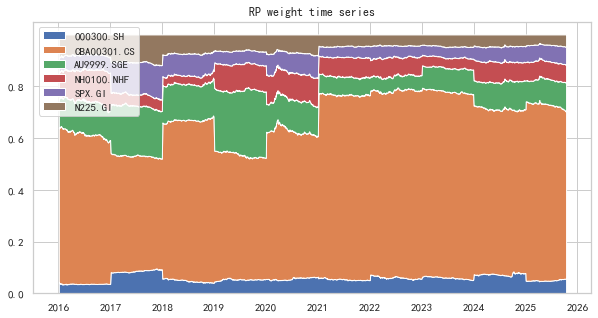

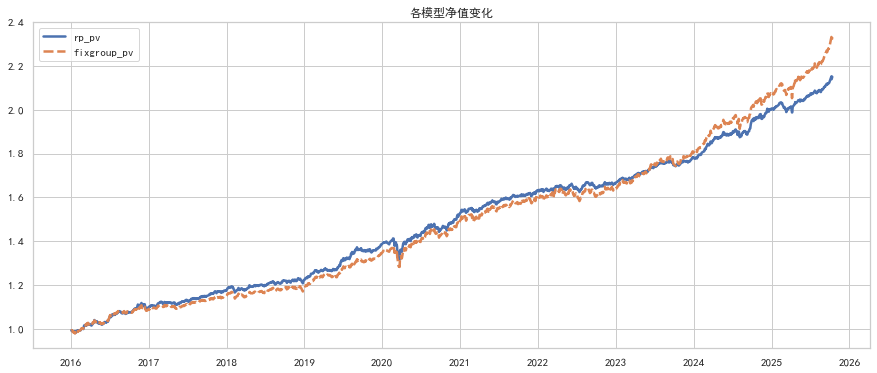

In [ ]:

test_rp = RP_solo_ver2_3.RPmodel(
            ret_data_1,
            start_date='2016-01-01',
            end_date='2025-10-14',
            change_time_delta='Y',
            cal_windows=600,
            cov_matrix_method = 'EWMA',#协方差选择
            risk_alloc = 'EWRCP', #'EWRCP'纯正的风险平价-等权分配风险 ，'SSWRCP' 按夏普率分配风险
            risk_budget_objective='naive_risk_parity',
            optimizer = 'SLSQP',#优化器选择
#                  optimization_part_showsFalse,
            optimization_initial_position = [0.06,0.94],
#                 optimization_initial_position = [0.14,0.14,0.14,0.14,0.14,0.16,0.14],
            optimization_montca = [True,500],
            leverage_switch=0,
            leverage_post_ratio=1,
            frequency_calcov = 52,
            )
test_rp.calcov = 252 #按周计算波动率
test_rp.ewma_lambda = 0.94
test_rp.cal_windows = 400 #600天计算风险平价
test_rp.benchmark_default()
test_rp.position_get(1,1)
test_rp.Backtest()
Annual_df = Eval_util.Year_analysis(test_rp.result_rp['rp_portfolio_ret'],dafult_VaR_year_windows=5,save_=False,file_name=None)
test_rp.plot_weight_change(test_rp.result_rp['rp_weight_df'])
print("="*60)


In [123]:
test_rp.result_rp['rp_pv']

2016-01-04    0.992093
2016-01-05    0.992616
2016-01-06    0.991870
2016-01-07    0.989129
2016-01-08    0.989734
                ...   
2025-09-29    2.124046
2025-09-30    2.127240
2025-10-09    2.152467
2025-10-10    2.139929
2025-10-13    2.150573
Length: 2373, dtype: float64

数据读取成功，共2373行数据
列名: [0]

前5行数据:
                   0
2016-01-04 -0.009072
2016-01-05  0.000383
2016-01-06 -0.000517
2016-01-07 -0.005109
2016-01-08  0.000719

数据清洗后，共2373行有效数据

开始计算年度风险收益指标和VaR分析...
正在计算每日过去250天的回撤率...
回撤数据已保存到draw.xlsx
正在分析 2016 年...
正在分析 2017 年...
正在分析 2018 年...
正在分析 2019 年...
正在分析 2020 年...
正在分析 2021 年...
正在分析 2022 年...
正在分析 2023 年...
正在分析 2024 年...
正在分析 2025 年...

=== 策略年度风险收益分析结果（含VaR分析）===

年度分析结果:
------------------------------------------------------------------------------------------------------------------------------------------------------
年度     区间收益率      最大回撤       年初最低回撤       基于回撤额度          年化波动率      夏普比率       卡玛比率      
       预计95%VaR     预计95%规模        
------------------------------------------------------------------------------------------------------------------------------------------------------
2016   0.0633     -0.0223    -0.0266       0.0380     1.6663     2.8378    
       NaN          NaN            

2017   0.0464     -0.0166    -0.0

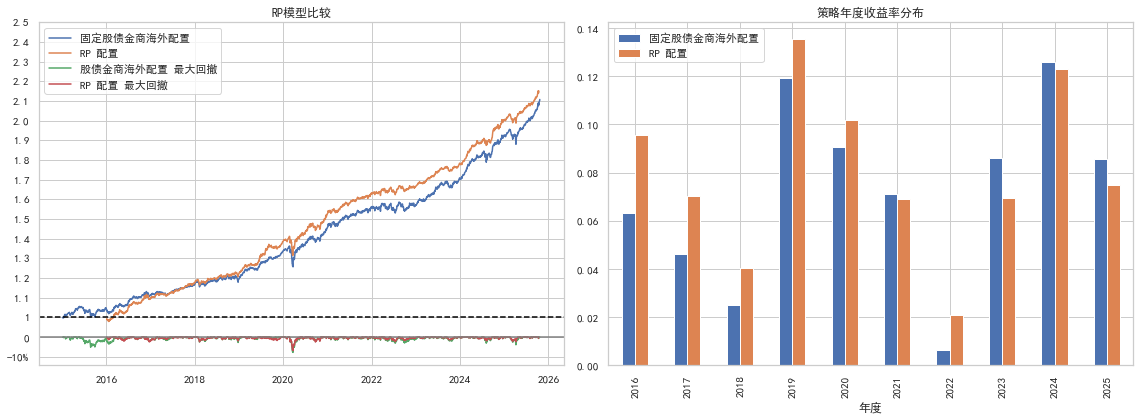

In [127]:
#pv
st_ft_1 = st_ft[st_ft.index.isin(test_rp.result_rp['rp_portfolio_ret'].index)]
rp_ret = test_rp.result_rp['rp_portfolio_ret']

_ft_performance = Eval_util.Year_analysis(st_ft_1)
_rp_performance = Eval_util.Year_analysis(rp_ret)
_ft_performance.set_index('年度',inplace=True)
_rp_performance.set_index('年度',inplace=True)
fig,axs = plt.subplots(1,2,figsize=(16,6))
# plt.figure(figsize=(8,6))
axs[0].plot(pvft,label='固定股债金商海外配置')
axs[0].plot(test_rp.result_rp['rp_pv'],label='RP 配置')
axs[0].axhline(y=1, xmin=0, xmax=2025, color='black', linestyle='--')
axs[0].plot(max_draw(pvft)+0.9,label='股债金商海外配置 最大回撤')
axs[0].plot(max_draw(test_rp.result_rp['rp_pv'])+0.9,label='RP 配置 最大回撤')
axs[0].axhline(y=0.9, xmin=0, xmax=2025, color='grey', linestyle='-')
axs[0].set_yticks([0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5])
axs[0].set_yticklabels(['-10%',0,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5])
axs[0].legend()
axs[0].set_title('RP模型比较')


year_performance = pd.concat([_ft_performance['区间收益率'],_rp_performance['区间收益率']],axis=1)
year_performance.columns = ['固定股债金商海外配置','RP 配置']   
axs[1] = year_performance.plot(kind='bar',ax=axs[1])
axs[1].set_title('策略年度收益率分布')
plt.tight_layout()
plt.show()

In [65]:
test_rp.get_eval()
test_rp.eval_df


2025-10-23 10:06:39,026 - RP_solo_ver2_3 - INFO - 策略相关指标,年化收益率:0.0639,波动率:0.0388,最大回撤:-0.1087,夏普比:1.6447


,"(600, Y, rp)",fixper
累计收益率,0.791628,0.923323
年化收益率,0.063882,0.071926
年化波动率,0.038841,0.035435
最大回撤,-0.108650,-0.055509
sharpe比率,1.644728,2.029824
Calmar比率,0.587962,1.295754


In [63]:
test_rp.result_rp['rp_weight_df'].mean()

000300.SH      0.041529
CBA00301.CS    0.376136
AU9999.SGE     0.095724
NH0100.NHF     0.056750
IXIC.GI        0.028413
SPX.GI         0.044949
HSI.HI         0.027457
N225.GI        0.039112
TY.CBT         0.243199
FTSE.GI        0.046731
dtype: float64

In [ ]:
import importlib

# 何为低利率时代（Useless)

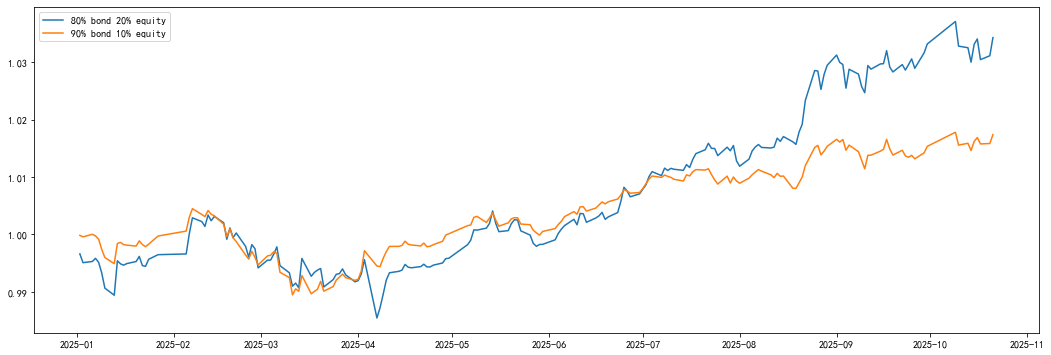

In [105]:
st8020_f = st8020_t.loc['2025-01-01':]
st9010_f = st9010_t.loc['2025-01-01':]
pv8020_f = (1+st8020_f).cumprod()
pv9010_f = (1+st9010_f).cumprod()

plt.figure(figsize=(18,6))
plt.plot(pv8020_f,label='80% bond 20% equity')
plt.plot(pv9010_f,label='90% bond 10% equity')
plt.legend()
plt.show()


In [ ]:
'''
对比2017年与2024年利率中枢
'''

2025年在股市表现较为优异的情况下，8020固定投资政策依旧只获得了3%的增长率，而如果将投资债券比率进一步提高到90%，则当前收益率仅为1%，远达不到资金成本。但看债券的收益率，达到了近10年来的第二低点，仅次于2017年债灾时期的收益率。虽然2017年以后便进入了长达7年的债牛区间，但是这并不意味着2025年之后会重现这种场景，这两次债熊之间存在本质差异。

2017年债市较差的表现来源于收益率较大的拉升，这种拉升使得债券资产的价格大幅下跌，但也为后面收益率下行而导致的长期债牛奠定了基础。但本年债券的表现不佳则主要是由债券低于2%的收益率和股债跷跷板所带动，后续收益率下降的逻辑本质区别于2017年。当前制造业经济体的重资产特性决定了国家没有太多加息动机，长端利率要想实现中枢上行，只能依靠通胀预期来上行或者经济增长来上行，除此之外，一种通过加息导致利率中枢上抬的可能是本波股市中科技进步带来的经济增长过热，促使央行加息，但在股市呈现慢牛的当下，这种可能性较低。因而债市在未来有较大的可能性逐步进入低利率世代（当前相比于欧美政策利率0%，我国只能说正在进入低利率），而央行为了进一步刺激经济而进行的降息虽然会在区间内带来资本利得，但利息收益低会使得固收类投资产品的吸引力进一步变差。

In [7]:
tb_10=w.edb("M0325687", "2010-01-01", "2025-10-22","Fill=Previous")

In [12]:
tb_10 = pd.DataFrame(tb_10.Data[0],index=tb_10.Times,columns=['10年国债收益率'])

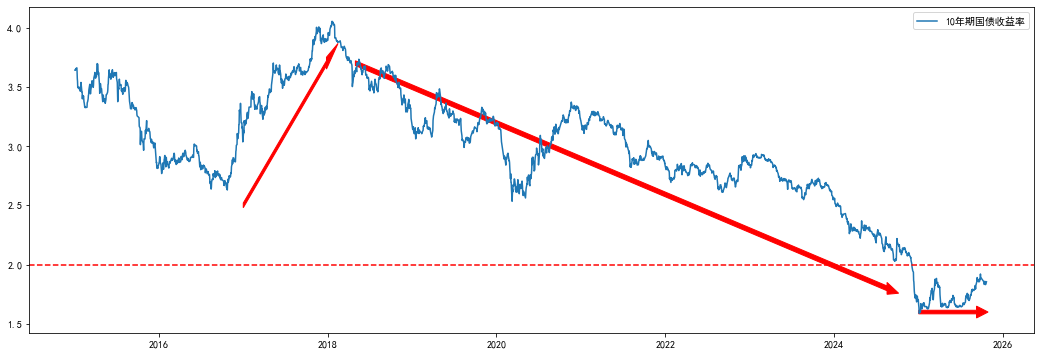

In [50]:
plt.figure(figsize=(18,6))
plt.plot(tb_10,label='10年期国债收益率')
plt.axhline(2.0,color='r',linestyle='--')
plt.arrow(date(2017,1,1),2.5,360,1.2,width=0.04,head_width=0.1,head_length=50,color='r')
plt.arrow(date(2018,5,1),3.7,2300,-1.9,width=0.04,head_width=0.1,head_length=50,color='r')
plt.arrow(date(2025,1,1),1.6,250,0,width=0.03,head_width=0.1,head_length=50,color='r')
plt.legend()
plt.show()

In [ ]:
'''
蒙卡模拟日本低利率时代
模拟之后的收益率情况
'''

'蒙卡模拟日本低利率时代\n模拟之后的收益率情况'

In [4]:
tbf_10=w.edb("P0602235", "2006-01-01", "2025-10-22","Fill=Previous")
tbf_10 = pd.DataFrame(np.array(tbf_10.Data).T,index=tbf_10.Times,columns=['10年日本国债收益率'])
tbf_10.fillna(method='ffill',inplace=True)
tbf_10.index = pd.to_datetime(tbf_10.index)


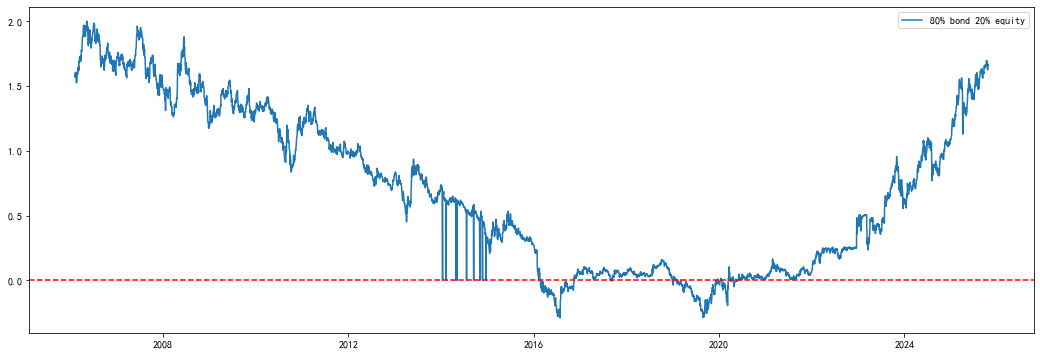

In [14]:
plt.figure(figsize=(18,6))
plt.plot(tbf_10,label='80% bond 20% equity')
plt.axhline(0,color='r',linestyle='--')
plt.legend()
plt.show()

In [9]:
jp_low_rate = tbf_10.loc[:'2020-01-01']

In [15]:
# fixincome_performance = Eval_util.Year_analysis(jp_low_rate['10年日本国债收益率'],save_=False).iloc[:,:6]